In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

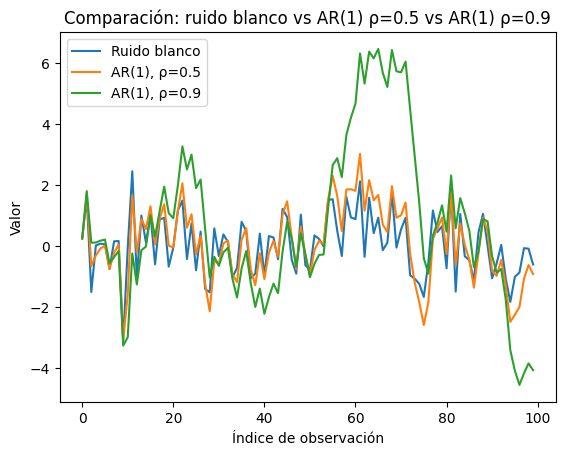

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# np.random.seed(0)
n = 100
epsilon = np.random.randn(n)

rho1, rho2 = 0.5, 0.9
ar_05 = np.zeros(n)
ar_09 = np.zeros(n)
ar_05[0] = ar_09[0] = epsilon[0]

for t in range(1, n):
    ar_05[t] = rho1 * ar_05[t-1] + epsilon[t]
    ar_09[t] = rho2 * ar_09[t-1] + epsilon[t]

df = pd.DataFrame({'epsilon': epsilon,
                   'ar_rho_0.5': ar_05,
                   'ar_rho_0.9': ar_09})

# 2. Gráfico
plt.figure()
plt.plot(df.index, df['epsilon'], label='Ruido blanco')
plt.plot(df.index, df['ar_rho_0.5'], label='AR(1), ρ=0.5')
plt.plot(df.index, df['ar_rho_0.9'], label='AR(1), ρ=0.9')
plt.legend()
plt.xlabel('Índice de observación')
plt.ylabel('Valor')
plt.title('Comparación: ruido blanco vs AR(1) ρ=0.5 vs AR(1) ρ=0.9')
plt.show()

7)

In [5]:
import statsmodels.api as sm

# Crear rezagos
df['lag_05'] = df['ar_rho_0.5'].shift(1)
df['lag_09'] = df['ar_rho_0.9'].shift(1)

# Eliminar NA
df_reg = df.dropna()

# Regresión AR(1) ρ=0.5 sin constante
model05 = sm.OLS(df_reg['ar_rho_0.5'], df_reg[['lag_05']]).fit()
# Regresión AR(1) ρ=0.9 sin constante
model09 = sm.OLS(df_reg['ar_rho_0.9'], df_reg[['lag_09']]).fit()

print(model05.summary())
print(model09.summary())

                                 OLS Regression Results                                
Dep. Variable:             ar_rho_0.5   R-squared (uncentered):                   0.333
Model:                            OLS   Adj. R-squared (uncentered):              0.327
Method:                 Least Squares   F-statistic:                              49.03
Date:                Sat, 23 Aug 2025   Prob (F-statistic):                    3.18e-10
Time:                        11:14:47   Log-Likelihood:                         -138.88
No. Observations:                  99   AIC:                                      279.8
Df Residuals:                      98   BIC:                                      282.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

8)

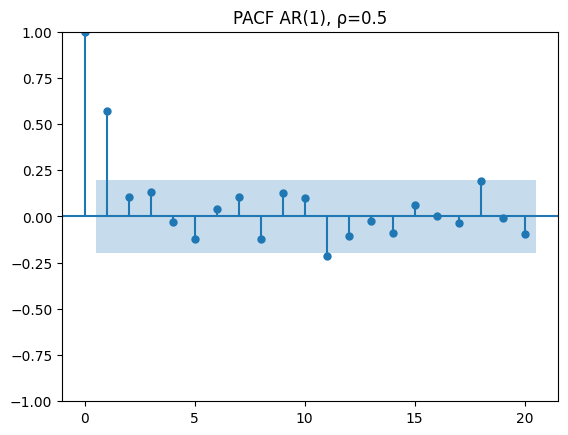

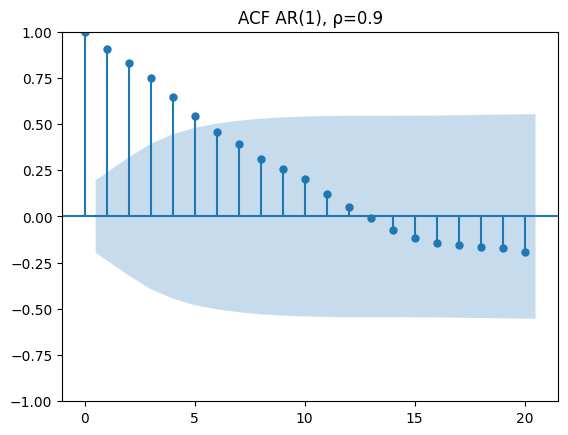

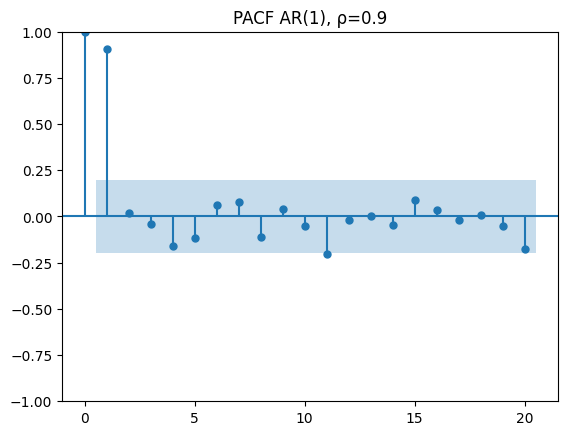

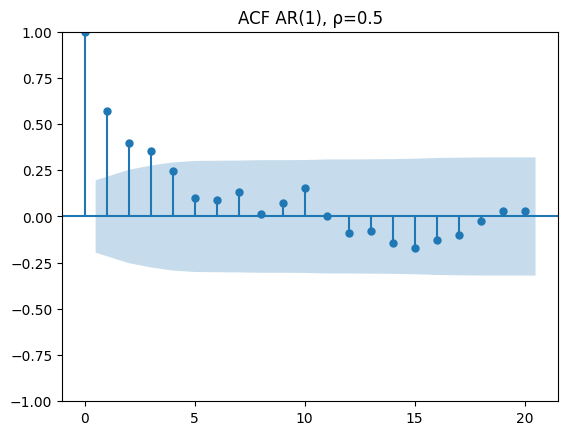

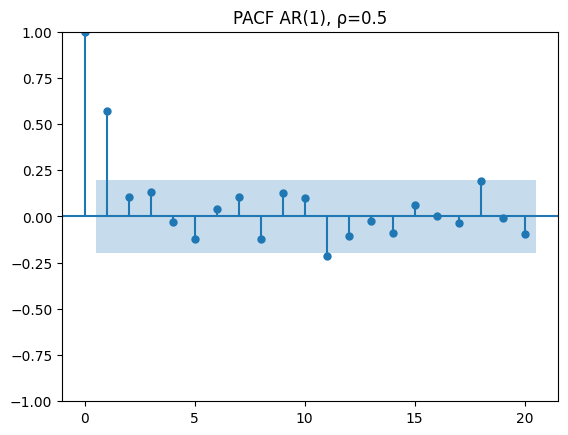

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf


# Cálculo de ACF y PACF hasta lag 20
max_lag = 20
acf_05 = acf(ar_05, nlags=max_lag)
pacf_05 = pacf(ar_05, nlags=max_lag)
acf_09 = acf(ar_09, nlags=max_lag)
pacf_09 = pacf(ar_09, nlags=max_lag)

# 4. Cuatro gráficos separados
plot_acf(ar_09, lags=max_lag, title='ACF AR(1), ρ=0.9')
plot_pacf(ar_09, lags=max_lag, title='PACF AR(1), ρ=0.9')
plot_acf(ar_05, lags=max_lag, title='ACF AR(1), ρ=0.5')
plot_pacf(ar_05, lags=max_lag, title='PACF AR(1), ρ=0.5')
